In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


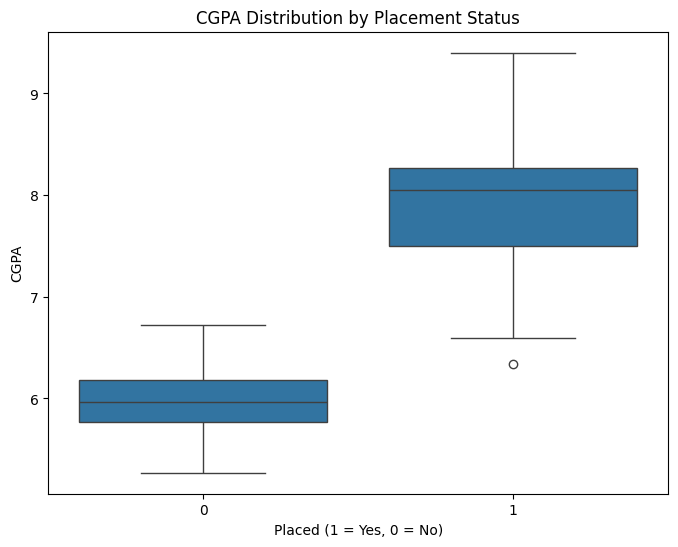

In [30]:
# @title CGPA Distribution by Placement Status

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='placed', y='cgpa', data=df)
plt.xlabel('Placed (1 = Yes, 0 = No)')
plt.ylabel('CGPA')
_ = plt.title('CGPA Distribution by Placement Status')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.describe().drop('count', axis = 0)

,cgpa,resume_score,placed
mean,6.9422,6.930500,0.500000
std,1.1192,0.979608,0.502519
min,5.2700,4.950000,0.000000
25%,5.9800,6.190000,0.000000
50%,6.6200,7.055000,0.500000
75%,8.0450,7.640000,1.000000
max,9.4000,9.060000,1.000000


In [7]:
df['placed'].value_counts()

placed
1    50
0    50
Name: count, dtype: int64

In [8]:
df.groupby('placed').mean()

,cgpa,resume_score
placed,,
0,5.9708,6.7998
1,7.9136,7.0612


<Axes: xlabel='cgpa', ylabel='Count'>

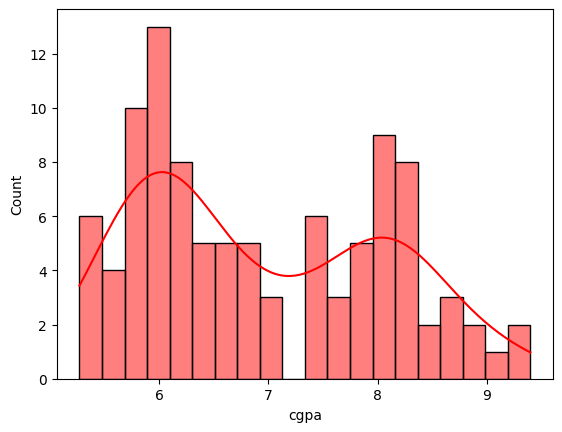

In [22]:
sns.histplot(df['cgpa'], bins = 20, kde = True, color = 'red')

<Axes: xlabel='resume_score', ylabel='Count'>

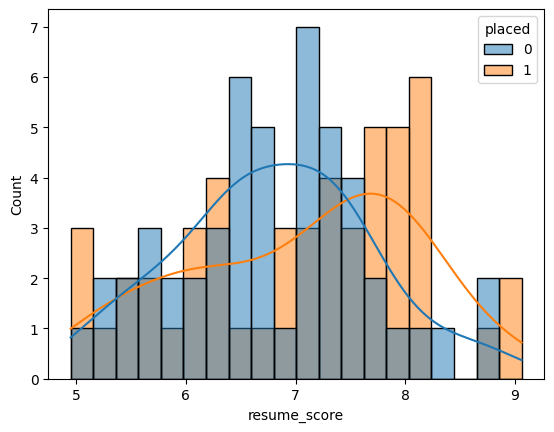

In [31]:
sns.histplot(data = df, x = 'resume_score', bins = 20, kde = True, hue = 'placed')

<Axes: xlabel='placed'>

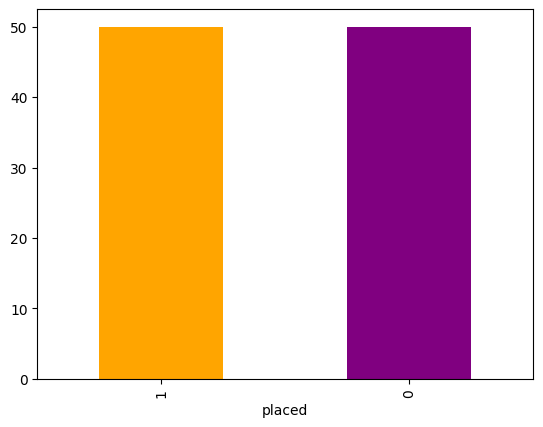

In [28]:
df['placed'].value_counts().plot(kind = 'bar', color = ['orange', 'purple'])

<Axes: xlabel='cgpa', ylabel='resume_score'>

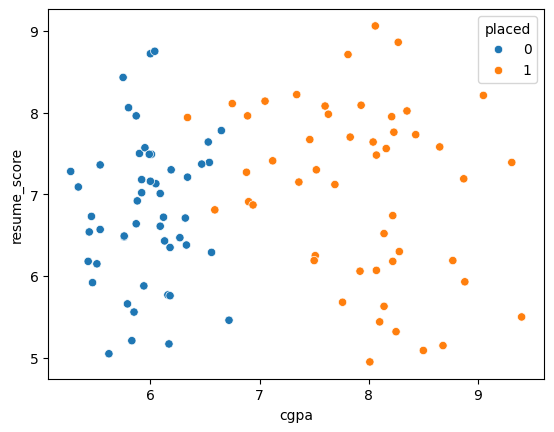

In [29]:
sns.scatterplot(data = df, x = 'cgpa', y = 'resume_score', hue = 'placed')

In [35]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [36]:
x.head()

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [32]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [37]:
p.fit(x,y)

Perceptron()

In [39]:
p.coef_

array([[ 40.26, -36.  ]])

In [40]:
p.intercept_

array([-25.])

In [38]:
p.score(x,y)

0.75

<Axes: >

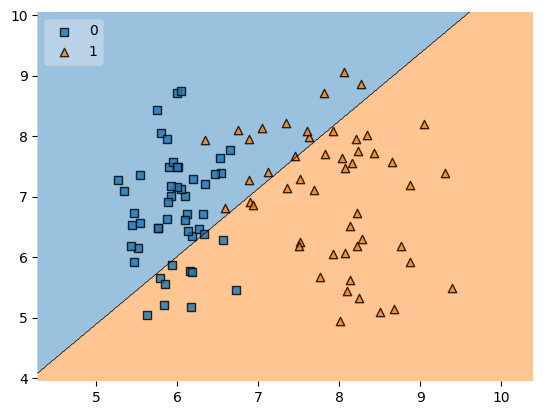

In [43]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values, clf = p, legend = 2)